In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('transactions_train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589879 entries, 0 to 589878
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            589879 non-null  int64  
 1   type            589879 non-null  object 
 2   amount          589879 non-null  float64
 3   nameOrig        589879 non-null  object 
 4   oldbalanceOrig  589879 non-null  float64
 5   newbalanceOrig  589879 non-null  float64
 6   nameDest        589879 non-null  object 
 7   oldbalanceDest  589878 non-null  float64
 8   newbalanceDest  589878 non-null  float64
 9   isFraud         589878 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 45.0+ MB


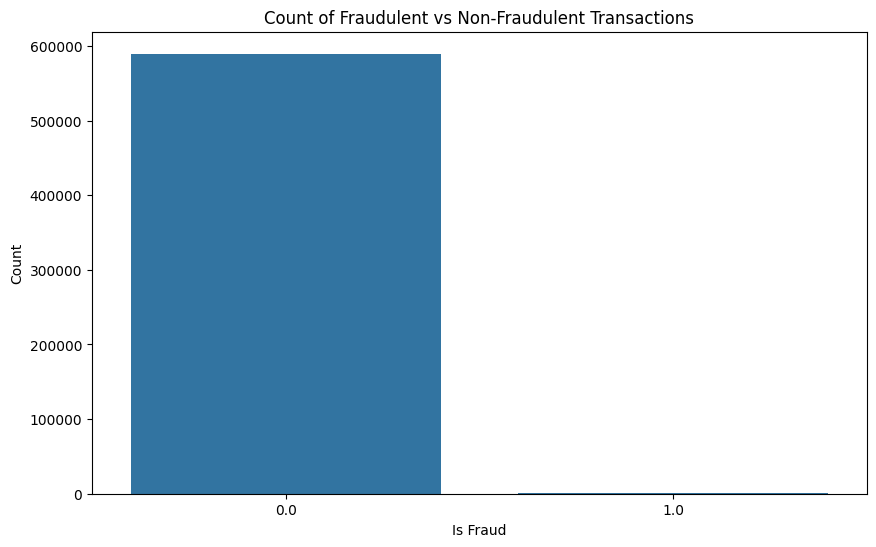

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='isFraud')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


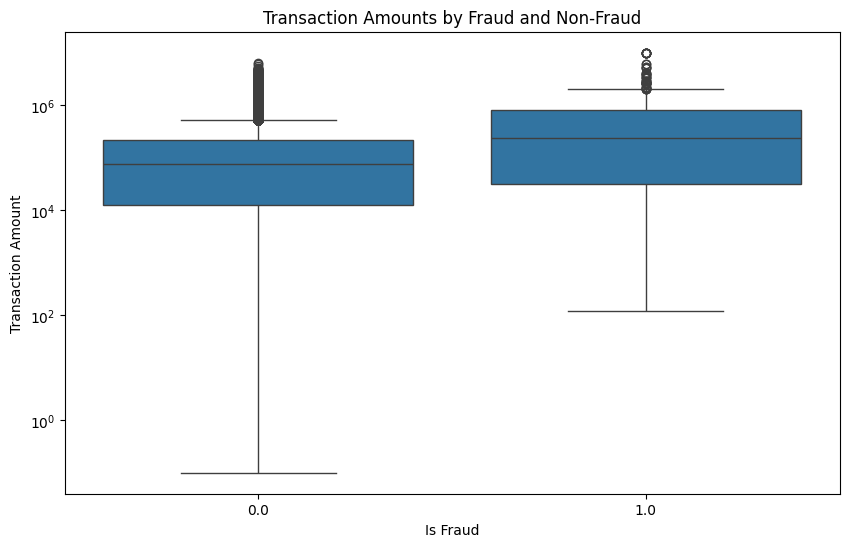

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='isFraud', y='amount')
plt.title('Transaction Amounts by Fraud and Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()


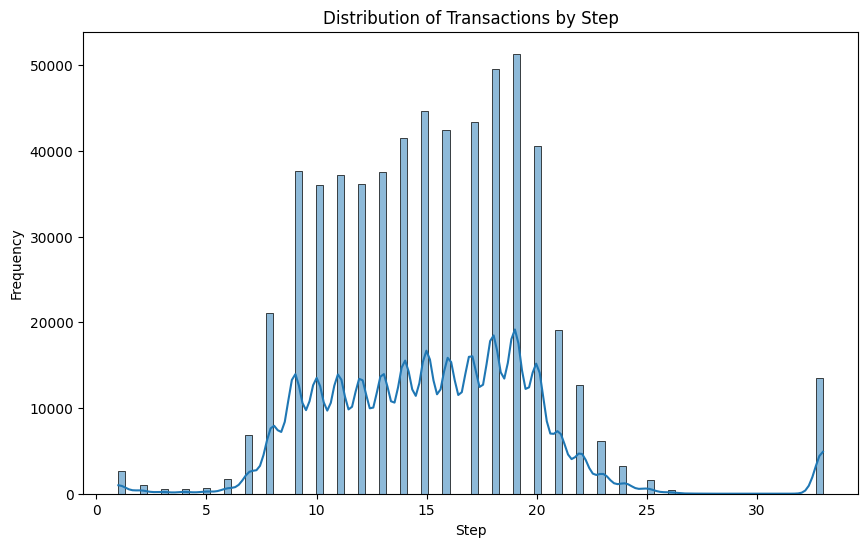

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='step', kde=True, bins=100)
plt.title('Distribution of Transactions by Step')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()


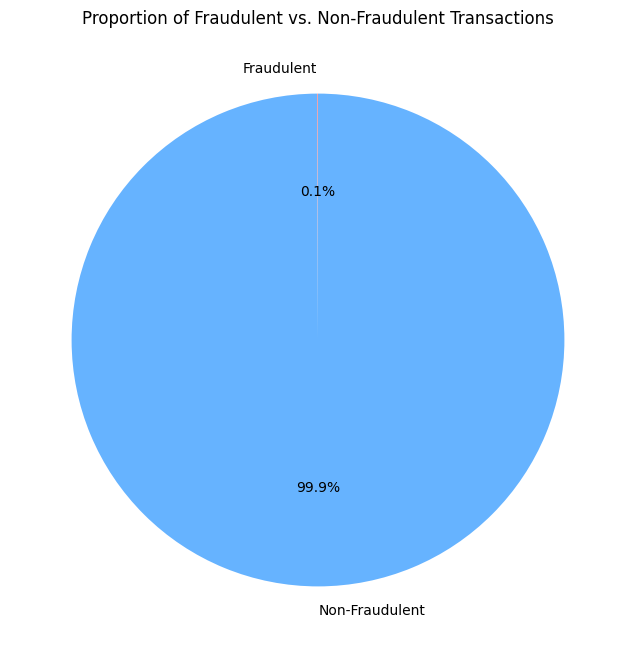

In [10]:
fraud_counts = dataset[dataset['isFraud'] == 1].value_counts()
non_fraud_counts = dataset[dataset['isFraud'] == 0].value_counts()

labels = ['Fraudulent', 'Non-Fraudulent']
sizes = [fraud_counts.sum(), non_fraud_counts.sum()]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


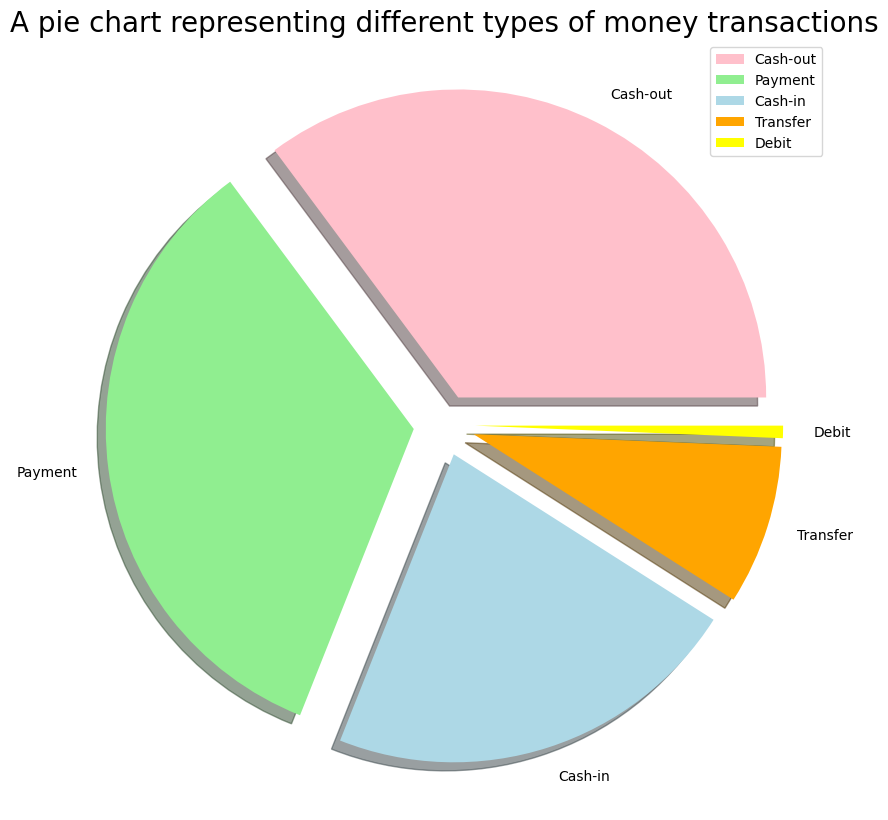

In [11]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [13]:
X = np.delete(X, [3, 6], axis=1)
X.shape

(589879, 7)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
print(X[:5])

[[0.0 0.0 0.0 1.0 0.0 1 9839.64 170136.0 160296.36 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 1 1864.28 21249.0 19384.72 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 1 181.0 181.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 1 181.0 181.0 0.0 21182.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 1 11668.14 41554.0 29885.86 0.0 0.0]]


In [18]:
X_numeric = X.astype(float)

has_nan = np.isnan(X_numeric).any()

print(has_nan)

True


In [20]:
nan_indices = np.where(np.isnan(X_numeric))
print(nan_indices)

(array([589878, 589878]), array([ 9, 10]))


In [21]:
X = np.delete(X, 589878, axis=0)
print(X.shape)

(589878, 11)


In [25]:
y_series = pd.Series(y)
fraud_counts = y_series.value_counts()

print(fraud_counts)

0.0    589521
1.0       357
Name: count, dtype: int64


In [27]:
y = np.delete(y, 589878)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(471902, 11)

In [32]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("accuracy of the model :",ac)

[[117899      3]
 [    22     52]]
accuracy of the model : 0.9997880924933885
